In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/HP/OneDrive/Desktop/XL sheets/Ames_Housing_Sales.csv")

In [3]:
data.shape

(1379, 80)

In [4]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856,854,0,NaN,3,1Fam,TA,No,706,0,...,0,Pave,8,856,AllPub,0,2003,2003,2008,208500
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,...,0,Pave,6,1262,AllPub,298,1976,1976,2007,181500
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,...,0,Pave,6,920,AllPub,0,2001,2002,2008,223500
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,...,0,Pave,7,756,AllPub,0,1915,1970,2006,140000
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,...,0,Pave,9,1145,AllPub,192,2000,2000,2008,250000


In [5]:
data=data.drop(['Alley','GarageArea','Fence','MasVnrType','MiscFeature','PoolArea'],axis=1)

In [6]:
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass',
       'MSZoning', 'MasVnrArea', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'ScreenPorch',
       'St

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   int64  
 1   2ndFlrSF       1379 non-null   int64  
 2   3SsnPorch      1379 non-null   int64  
 3   BedroomAbvGr   1379 non-null   int64  
 4   BldgType       1379 non-null   object 
 5   BsmtCond       953 non-null    object 
 6   BsmtExposure   953 non-null    object 
 7   BsmtFinSF1     1379 non-null   int64  
 8   BsmtFinSF2     1379 non-null   int64  
 9   BsmtFinType1   953 non-null    object 
 10  BsmtFinType2   952 non-null    object 
 11  BsmtFullBath   1379 non-null   int64  
 12  BsmtHalfBath   1379 non-null   int64  
 13  BsmtQual       953 non-null    object 
 14  BsmtUnfSF      1379 non-null   int64  
 15  CentralAir     1379 non-null   object 
 16  Condition1     1379 non-null   object 
 17  Condition2     1379 non-null   object 
 18  Electric

In [8]:
data.duplicated().value_counts()

False    1379
Name: count, dtype: int64

In [9]:
data.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
BedroomAbvGr    0
BldgType        0
               ..
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
SalePrice       0
Length: 74, dtype: int64

## IMPUTATION METHOD

In [10]:
!pip install feature_engine -q

In [11]:
from feature_engine.imputation import CategoricalImputer

In [12]:
cat_columns=data.select_dtypes(include="object").columns

In [13]:
cat_columns

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning',
       'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [14]:
cat_imputer= CategoricalImputer(imputation_method='missing',variables=['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','FireplaceQu','PoolQC'])

In [15]:
data=cat_imputer.fit_transform(data)

In [16]:
data.shape

(1379, 74)

In [17]:
data.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
BedroomAbvGr    0
BldgType        0
               ..
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
SalePrice       0
Length: 74, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   int64  
 1   2ndFlrSF       1379 non-null   int64  
 2   3SsnPorch      1379 non-null   int64  
 3   BedroomAbvGr   1379 non-null   int64  
 4   BldgType       1379 non-null   object 
 5   BsmtCond       1379 non-null   object 
 6   BsmtExposure   1379 non-null   object 
 7   BsmtFinSF1     1379 non-null   int64  
 8   BsmtFinSF2     1379 non-null   int64  
 9   BsmtFinType1   1379 non-null   object 
 10  BsmtFinType2   1379 non-null   object 
 11  BsmtFullBath   1379 non-null   int64  
 12  BsmtHalfBath   1379 non-null   int64  
 13  BsmtQual       1379 non-null   object 
 14  BsmtUnfSF      1379 non-null   int64  
 15  CentralAir     1379 non-null   object 
 16  Condition1     1379 non-null   object 
 17  Condition2     1379 non-null   object 
 18  Electric

In [19]:
num=data.select_dtypes(include="number").columns
num

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageCars', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'SalePrice'],
      dtype='object')

## IMPUTATION METHOD

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

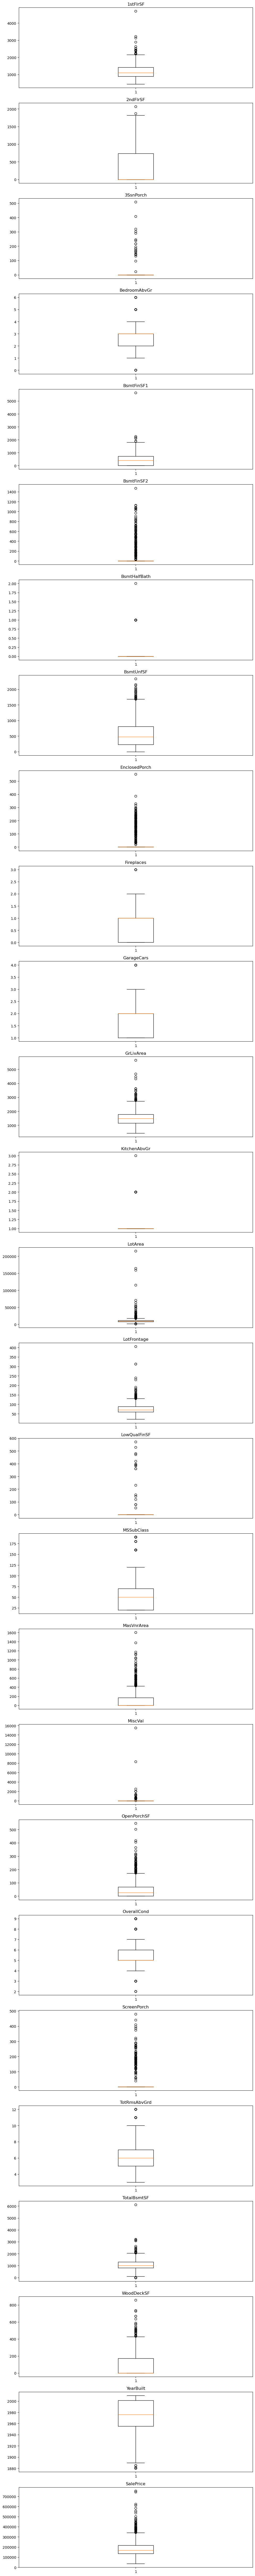

In [21]:
# boxplot for each numerical column.
num_col = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'GarageCars',
       'GrLivArea', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'OverallCond',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'SalePrice']
# Adjust the number of rows in the subplot grid to accommodate all columns
fig, axes = plt.subplots(nrows=len(num_col), ncols=1, figsize=(10, 100)) # Increased figure height for better visualization
i=0

for col in num_col:
    ax = axes[i]
    ax.boxplot(data[col])
    ax.set_title(col)
    i += 1

plt.tight_layout() # Adjust spacing between subplots
plt.show()

In [22]:
data[['3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', 'KitchenAbvGr', 'LowQualFinSF', 'MiscVal', 'ScreenPorch']] = data[['3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', 'KitchenAbvGr', 'LowQualFinSF', 'MiscVal', 'ScreenPorch']].astype(str)

In [23]:
data.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,Fireplaces,FullBath,GarageCars,GarageYrBlt,...,OpenPorchSF,OverallCond,OverallQual,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,1177.129804,353.424946,2.865120,455.578680,0.430747,570.765047,0.641769,1.580131,1.870921,1978.506164,...,47.276287,5.577955,6.187092,6.552574,1074.445975,97.456853,1972.958666,1985.435098,2007.812183,185479.51124
std,387.014961,439.553171,0.783961,459.691379,0.514052,443.677845,0.645985,0.548051,0.630055,24.689725,...,65.210465,1.081031,1.345780,1.589821,436.371874,126.699192,29.379883,20.444852,1.330221,79023.89060
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1900.000000,...,0.000000,2.000000,2.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,35311.00000
25%,894.000000,0.000000,2.000000,0.000000,0.000000,228.000000,0.000000,1.000000,1.000000,1961.000000,...,0.000000,5.000000,5.000000,5.000000,810.000000,0.000000,1955.000000,1968.000000,2007.000000,134000.00000
50%,1098.000000,0.000000,3.000000,400.000000,0.000000,476.000000,1.000000,2.000000,2.000000,1980.000000,...,27.000000,5.000000,6.000000,6.000000,1008.000000,0.000000,1976.000000,1994.000000,2008.000000,167500.00000
75%,1414.000000,738.500000,3.000000,732.000000,1.000000,811.000000,1.000000,2.000000,2.000000,2002.000000,...,69.500000,6.000000,7.000000,7.000000,1314.000000,171.000000,2001.000000,2004.000000,2009.000000,217750.00000
max,4692.000000,2065.000000,6.000000,5644.000000,2.000000,2336.000000,3.000000,3.000000,4.000000,2010.000000,...,547.000000,9.000000,10.000000,12.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000,755000.00000


## IQR METHOD

In [24]:
num_col = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1','BsmtUnfSF','Fireplaces', 'GarageCars','GrLivArea', 'LotArea',
       'LotFrontage', 'MSSubClass', 'MasVnrArea','OpenPorchSF', 'OverallCond','TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'SalePrice']
for cols in num_col:
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3-Q1
    m1 = Q1-1.5*IQR
    m2 = Q3+1.5*IQR
    data[cols] = data[cols].clip(lower=m1,upper=m2)

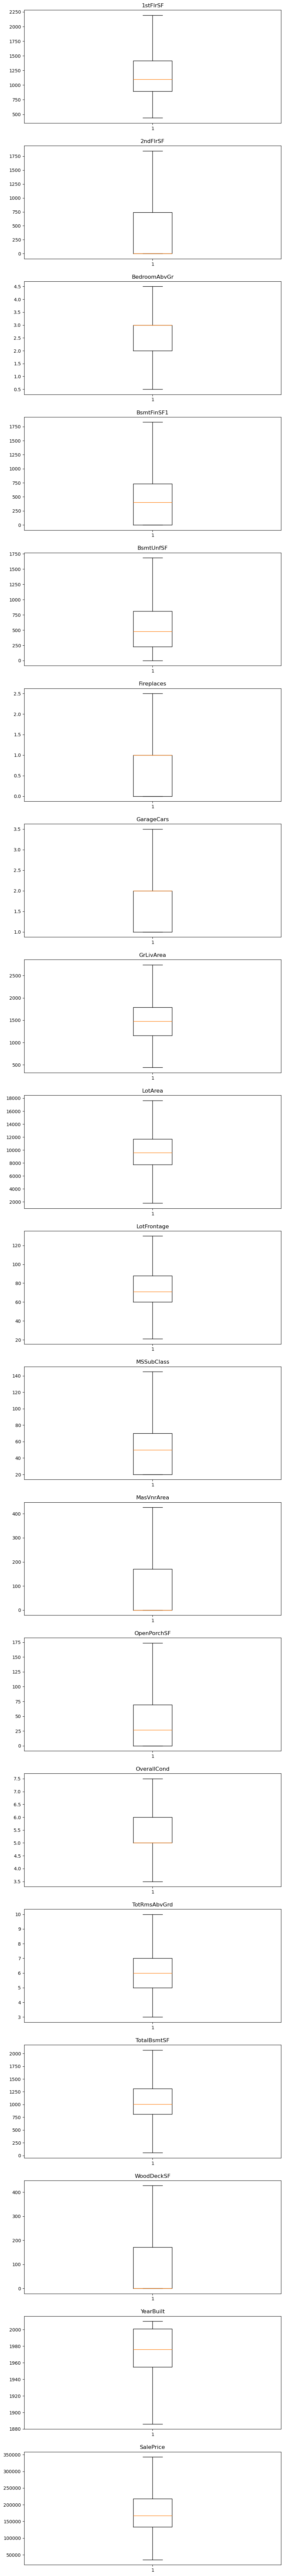

In [25]:
#  checking of boxplot after IQR
num_col = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtUnfSF',
       'Fireplaces', 'GarageCars',
       'GrLivArea', 'LotArea',
       'LotFrontage', 'MSSubClass', 'MasVnrArea',
       'OpenPorchSF', 'OverallCond',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'SalePrice']
fig, axes =plt.subplots(nrows=len(num_col), ncols=1, figsize=(10, 100))
i=0

for col in num_col:
    ax = axes[i]
    ax.boxplot(data[col])
    ax.set_title(col)
    i += 1

## ENCODING

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
L_encoder = LabelEncoder()

In [28]:
#  encoding categorical data by looping through columns
for i in cat_columns:
    data[i] = L_encoder.fit_transform(data[i])

In [29]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856,854.0,0,3.0,0,3,4,706,0,2,...,0,1,8,856,0,0.0,2003,2003,2008,208500
1,1262,0.0,0,3.0,0,3,1,978,0,0,...,0,1,6,1262,0,298.0,1976,1976,2007,181500
2,920,866.0,0,3.0,0,3,3,486,0,2,...,0,1,6,920,0,0.0,2001,2002,2008,223500
3,961,756.0,0,3.0,0,1,4,216,0,0,...,0,1,7,756,0,0.0,1915,1970,2006,140000
4,1145,1053.0,0,4.0,0,3,0,655,0,2,...,0,1,9,1145,0,192.0,2000,2000,2008,250000


## TRAIN TEST SPLIT

In [30]:
X = data.drop(columns=['SalePrice'],axis=1)
y = data['SalePrice']

In [31]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## SCALING

In [32]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [33]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856,854.0,0,3.0,0,3,4,706,0,2,...,0,1,8,856,0,0.0,2003,2003,2008,208500
1,1262,0.0,0,3.0,0,3,1,978,0,0,...,0,1,6,1262,0,298.0,1976,1976,2007,181500
2,920,866.0,0,3.0,0,3,3,486,0,2,...,0,1,6,920,0,0.0,2001,2002,2008,223500
3,961,756.0,0,3.0,0,1,4,216,0,0,...,0,1,7,756,0,0.0,1915,1970,2006,140000
4,1145,1053.0,0,4.0,0,3,0,655,0,2,...,0,1,9,1145,0,192.0,2000,2000,2008,250000


## PCA PROCESS

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 30)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## MLFLOW

In [ ]:
import mlflow
import os
os.environ['GIT_PYTHON_REFRESH']='quiet'
os.environ['MLFLOW_TRACKING_URI']="file:///Users/HP/OneDrive/Documents/Bhuvan/b"

In [ ]:
mlflow.set_experiment("Ames_housing with PCA, LE & MMS")
mlflow.set_experiment_tag('LabelencodingMinmaxscalar-tag','exi')

In [ ]:
with mlflow.start_run():    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import r2_score
    
    # model object initialization
    RandFor=RandomForestRegressor(n_estimators=5000,max_depth=6)
    GBM=GradientBoostingRegressor(n_estimators=3000,max_depth=6,learning_rate=0.01,min_samples_split=5)
    rf_n_estimators=5000
    #logging parameters
    mlflow.log_param("n_estimators",rf_n_estimators)
    mlflow.log_param('rf_max_depth',6)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',6)
    mlflow.log_param('gbm_learning_rate',0.01)
    mlflow.log_param('gbm_minimum_samples_split',5)
    
    #training models
    rf=RandFor.fit(X_train,y_train)
    gbm=GBM.fit(X_train,y_train)
    
    #training scores
    training_score_rf=RandFor.score(X_train,y_train)
    training_score_gbm=GBM.score(X_train,y_train)
    
    #logging training score
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    
    #value predictions
    y_pred_rf=rf.predict(X_test)
    y_pred_gbm=gbm.predict(X_test)
    
    #prediction evaluations
    testing_score_rf=r2_score(y_pred_rf,y_test)
    testing_score_gbm=r2_score(y_pred_gbm,y_test)
    
    #logging evaluation scores
    mlflow.log_metric("rf_testing_score", testing_score_rf)
    mlflow.log_metric("gbm_testing_score",testing_score_gbm)
    
    #logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")